# EfficientNetV2 with tf-hub


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<table class="tfo-notebook-buttons" align="left">
<td>
  <a target="_blank"  href="https://github.com/google/automl/blob/master/efficientnetv2/tfhub.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://colab.sandbox.google.com/github/google/automl/blob/master/efficientnetv2/tfhub.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td><td>
    <!----<a href="https://tfhub.dev/google/collections/image/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />TF Hub models</a>--->
  </td>
</table>

## 1.Introduction

[EfficientNetV2](https://arxiv.org/abs/2104.00298) is a family of classification models, with better accuracy, smaller size, and faster speed than previous models.


This doc describes some examples with EfficientNetV2 tfhub. For more details, please visit the official code: https://github.com/google/automl/tree/master/efficientnetv2

## 2.Select the TF2 SavedModel module to use

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print('TF version:', tf.__version__)
print('Hub version:', hub.__version__)
print('Phsical devices:', tf.config.list_physical_devices())

def get_hub_url_and_isize(model_name, ckpt_type, hub_type):
  if ckpt_type == '1k':
    ckpt_type = ''  # json doesn't support empty string
  else:
    ckpt_type = '-' + ckpt_type  # add '-' as prefix
  
  hub_url_map = {
    'efficientnetv2-b0': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0/{hub_type}',
    'efficientnetv2-b1': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1/{hub_type}',
    'efficientnetv2-b2': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2/{hub_type}',
    'efficientnetv2-b3': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3/{hub_type}',
    'efficientnetv2-s':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s/{hub_type}',
    'efficientnetv2-m':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m/{hub_type}',
    'efficientnetv2-l':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l/{hub_type}',

    'efficientnetv2-b0-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0-21k/{hub_type}',
    'efficientnetv2-b1-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1-21k/{hub_type}',
    'efficientnetv2-b2-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2-21k/{hub_type}',
    'efficientnetv2-b3-21k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3-21k/{hub_type}',
    'efficientnetv2-s-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k/{hub_type}',
    'efficientnetv2-m-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k/{hub_type}',
    'efficientnetv2-l-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k/{hub_type}',
    'efficientnetv2-xl-21k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-xl-21k/{hub_type}',

    'efficientnetv2-b0-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0-21k-ft1k/{hub_type}',
    'efficientnetv2-b1-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b1-21k-ft1k/{hub_type}',
    'efficientnetv2-b2-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b2-21k-ft1k/{hub_type}',
    'efficientnetv2-b3-21k-ft1k': f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b3-21k-ft1k/{hub_type}',
    'efficientnetv2-s-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-s-21k-ft1k/{hub_type}',
    'efficientnetv2-m-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-m-21k-ft1k/{hub_type}',
    'efficientnetv2-l-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-l-21k-ft1k/{hub_type}',
    'efficientnetv2-xl-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-xl-21k-ft1k/{hub_type}',
      
    # efficientnetv1
    'efficientnet_b0': f'https://tfhub.dev/tensorflow/efficientnet/b0/{hub_type}/1',
    'efficientnet_b1': f'https://tfhub.dev/tensorflow/efficientnet/b1/{hub_type}/1',
    'efficientnet_b2': f'https://tfhub.dev/tensorflow/efficientnet/b2/{hub_type}/1',
    'efficientnet_b3': f'https://tfhub.dev/tensorflow/efficientnet/b3/{hub_type}/1',
    'efficientnet_b4': f'https://tfhub.dev/tensorflow/efficientnet/b4/{hub_type}/1',
    'efficientnet_b5': f'https://tfhub.dev/tensorflow/efficientnet/b5/{hub_type}/1',
    'efficientnet_b6': f'https://tfhub.dev/tensorflow/efficientnet/b6/{hub_type}/1',
    'efficientnet_b7': f'https://tfhub.dev/tensorflow/efficientnet/b7/{hub_type}/1',
  }
  
  image_size_map = {
    'efficientnetv2-b0': 224,
    'efficientnetv2-b1': 240,
    'efficientnetv2-b2': 260,
    'efficientnetv2-b3': 300,
    'efficientnetv2-s':  384,
    'efficientnetv2-m':  480,
    'efficientnetv2-l':  480,
    'efficientnetv2-xl':  512,
  
    'efficientnet_b0': 224,
    'efficientnet_b1': 240,
    'efficientnet_b2': 260,
    'efficientnet_b3': 300,
    'efficientnet_b4': 380,
    'efficientnet_b5': 456,
    'efficientnet_b6': 528,
    'efficientnet_b7': 600,
  }
  
  hub_url = hub_url_map.get(model_name + ckpt_type)
  image_size = image_size_map.get(model_name, 224)
  return hub_url, image_size


def get_imagenet_labels(filename):
  labels = []
  with open(filename, 'r') as f:
    for line in f:
      labels.append(line.split('\t')[1][:-1])  # split and remove line break.
  return labels


TF version: 2.7.0
Hub version: 0.12.0
Phsical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 3.2 ImageNet21k checkpoint

Get hub_url and image_size


In [ ]:
# Build model
import tensorflow_hub as hub
model_name = 'efficientnetv2-b0' #@param {type:'string'}
ckpt_type = '21k'   # @param ['21k', '21k-ft1k', '1k']
hub_type = 'feature-vector' # @param ['feature-vector']
batch_size =  32#@param {type:"integer"}
hub_url, image_size = get_hub_url_and_isize(model_name, ckpt_type, hub_type)

Get dataset

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

import h5py

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

In [ ]:
BATCH_SIZE = 32
import os
from keras.models import Model
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
train_generator = ImageDataGenerator(rotation_range=.15, 
                                     #brightness_range=[0.1, 0.7],
                                     width_shift_range=0.2, 
                                     height_shift_range=0.2,
                                     horizontal_flip=True, 
                                     #vertical_flip=True,
                                     validation_split=0.20,
                                     preprocessing_function=preprocess_input)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [ ]:
train_data_dir = '/content/drive/MyDrive/COSI/Video processing and Advanced project/ferattention-master/Emotion_Classes'
class_subset = sorted(os.listdir(train_data_dir))[:10]
traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(48, 48),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               #color_mode = 'grayscale',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(48, 48),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               #color_mode = 'grayscale',
                                               batch_size=BATCH_SIZE,
                                               shuffle=False,
                                               seed=42)


Found 10480 images belonging to 10 classes.
Found 2620 images belonging to 10 classes.


In [ ]:
from keras import callbacks
# whether to finetune the whole model or just the top layer.
do_fine_tuning = True #@param {type:"boolean"}
num_epochs =  50 #@param {type:"integer"}

tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=[image_size, image_size, 3]),
    hub.KerasLayer(hub_url, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(10,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

model.build((None, image_size, image_size, 3))
model.summary()

model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('emotion10{epoch:02d}.h5',period=3,save_weights_only=True, save_best_only=True,monitor='val_loss')
#saving the weights of the model
#model.save_weights('emotion10.h5')
steps_per_epoch = traingen.samples // traingen.batch_size
validation_steps = validgen.samples // validgen.batch_size
hist = model.fit(
    traingen,
    epochs=50, steps_per_epoch=steps_per_epoch,
    validation_data=validgen,
    callbacks = [model_checkpoint],
    validation_steps=validation_steps).history
model.save('emotion10')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 5,871,514
Non-trainable params: 60,608
_________________________________________________________________


Epoch 1/50
327/327 [==============================] - 2478s 8s/step - loss: 3.0519 - accuracy: 0.1995 - val_loss: 1.9425 - val_accuracy: 0.3341
Epoch 2/50
327/327 [==============================] - 53s 161ms/step - loss: 1.9561 - accuracy: 0.3550 - val_loss: 1.6489 - val_accuracy: 0.4838
Epoch 3/50
327/327 [==============================] - 53s 161ms/step - loss: 1.7195 - accuracy: 0.4607 - val_loss: 1.4967 - val_accuracy: 0.5640
Epoch 4/50
327/327 [==============================] - 53s 161ms/step - loss: 1.5612 - accuracy: 0.5309 - val_loss: 1.3450 - val_accuracy: 0.6312
Epoch 5/50
327/327 [==============================] - 53s 161ms/step - loss: 1.4378 - accuracy: 0.5914 - val_loss: 1.2517 - val_accuracy: 0.6686
Epoch 6/50
327/327 [==============================] - 53s 161ms/step - loss: 1.3454 - accuracy: 0.6346 - val_loss: 1.1932 - val_accuracy: 0.6995
Epoch 7/50
327/327 [==============================] - 53s 161ms/step - loss: 1.2723 - accuracy: 0.6686 - val_loss: 1.1656 - val_acc

INFO:tensorflow:Assets written to: emotion10/assets


INFO:tensorflow:Assets written to: emotion10/assets


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/emotion10')
model.load_weights('/content/emotion10.h5')

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


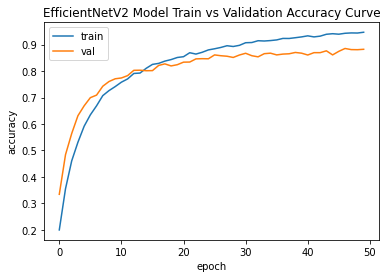

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('EfficientNetV2 Model Train vs Validation Accuracy Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

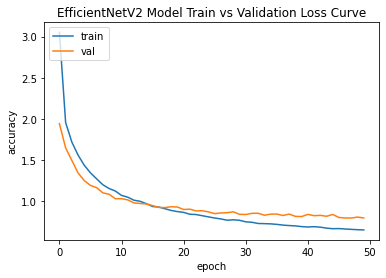

In [ ]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('EfficientNetV2 Model Train vs Validation Loss Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import time
np.set_printoptions(precision=2)
class_names = ['angry', 'disgust', 'fear','happy', 'mockery', 'neutral','sad', 'surprise', 'think', 'wink']

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn.metrics import ConfusionMatrixDisplay
start = time.clock()
Y_pred = model.predict(validgen)
end = time.clock()
print("Time per image: {}".format((end-start)/len(validgen)))
y_pred = np.argmax(Y_pred, axis=1)
print(end-start)
cm = confusion_matrix(validgen.classes, y_pred)
#plot_confusion_matrix(X = y_pred, y_true=validgen.classes, labels = class_names, normalize=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


Time per image: 0.11587239024389952
9.50153599999976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


Normalized confusion matrix


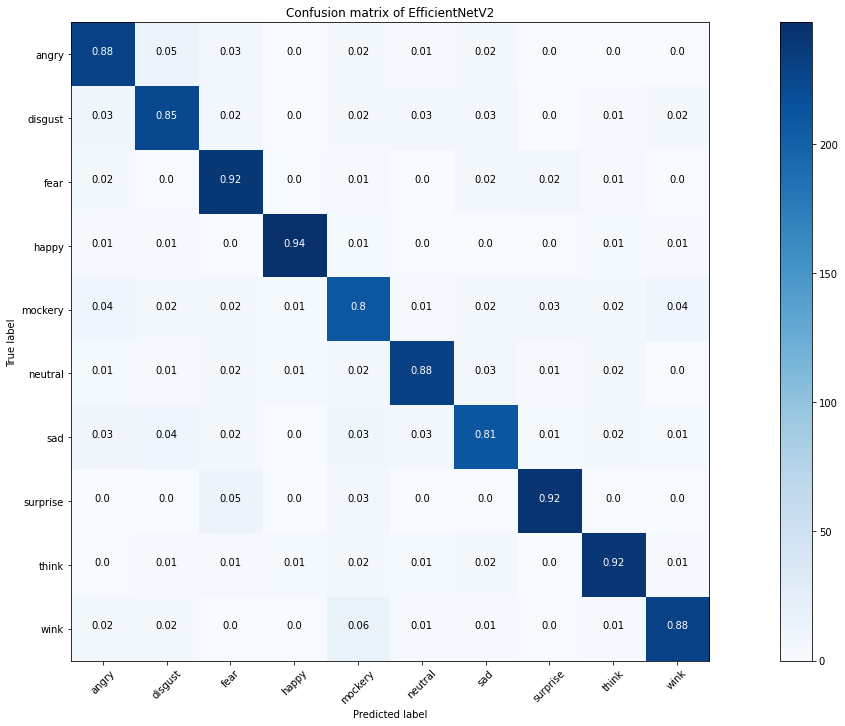

In [ ]:
import matplotlib.pyplot as plt
import itertools 
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix of EfficientNetV2', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(20,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, class_names)